# Kaggle 30 Days of Machine Learning

---

## Introduction

For this competition, you will be predicting a continuous `target` based on a number of feature columns given in the data. All of the feature columns, `cat0` - `cat9` are categorical, and the feature columns `cont0` - `cont13` are continuous.

**Files**
- **train.csv** - the training data with the `target` column
- **test.csv** - the test set; you will be predicting the `target` for each row in this file
- **sample_submission.csv** - a sample submission file in the correct format

---

## Dependencies

In [1]:
############
# Packages #
############
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import math as mt
import scipy
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# import tensorflow_probability as tfp
# import datascientists as ds

%matplotlib inline
try:
    %load_ext autotime
except:
    !pip install autotime
    %load_ext autotime

############
# Settings #
############
# Pandas Settings
pd.set_option('max_rows', 20)
pd.set_option('display.colheader_justify', 'left')
# plotly.express Settings
#   px.defaults.template = 'plotly_white' # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
px.defaults.width = 1200
px.defaults.height = 800
# plotly.io Settings for both plotly.graph_objects and plotly.express
pio.templates.default = "plotly_white" # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
pio.kaleido.scope.default_format = 'svg'
pio.kaleido.scope.default_scale = 1
# Config for fig
#   https://plotly.com/python/configuration-options/
#   https://github.com/plotly/plotly.js/blob/master/src/plot_api/plot_config.js
config = {
    'editable': True, # Axes editable
    'toImageButtonOptions': {
        'format': 'svg', # one of png, svg, jpeg, webp
        'filename': 'fig',
        'height': None, # Set to download at the currently-rendered size by setting height and width to None
        'width': None, # # Set to download at the currently-rendered size by setting height and width to None
        'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
      }, 
    'scrollZoom': True, 
    'doubleClick': 'reset+autosize', 
    'showSources': False
}

#############
# Documents #
#############
# IPython
#    https://ipython.org/ipython-doc/stable/interactive/reference.html#dynamic-object-information
# Pandas
#    https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api
# Numpy
#    https://numpy.org/doc/stable/reference/index.html
# Matplotlib
#    https://matplotlib.org/stable/api/
# Plotly
#    https://plotly.com/python-api-reference/index.html
# Plotly - Image Export Settings (Kaleido)
#    https://plotly.com/python/static-image-export/
# math
#    https://docs.python.org/3/library/math.html
# Statistical functions (scipy.stats)
#    https://docs.scipy.org/doc/scipy/reference/stats.html
# scikit-learn
#    https://scikit-learn.org/stable/
# TensorFlow
#    https://www.tensorflow.org/api_docs/python/tf
# TensorFlow Probability
#    https://www.tensorflow.org/probability
# datascientists
#    https://github.com/ZacksAmber/datascientists

time: 145 ms (started: 2021-08-17 14:35:43 -07:00)


---

## Import Dataset

In [33]:
import os
kaggle_project = '30-days-of-ml'
data_dir = ('./data' if os.path.exists('data') else f'/kaggle/input/{kaggle_project}')

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/train.csv
./data/sample_submission.csv
./data/.ipynb_checkpoints/sample_submission-checkpoint.csv
time: 2.28 ms (started: 2021-08-17 15:07:25 -07:00)


In [34]:
train_data = pd.read_csv(f'{data_dir}/train.csv')
test_data = pd.read_csv(f'{data_dir}/test.csv')

train_data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


time: 1.75 s (started: 2021-08-17 15:07:27 -07:00)


---

## EDA

---

### Missing Values

Since the train dataset does not have any missing value, there is not necessary for data imputation.

In [3]:
# Number of missing values per column
train_data.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
         ..
cont10    0
cont11    0
cont12    0
cont13    0
target    0
Length: 26, dtype: int64

time: 127 ms (started: 2021-08-17 14:35:45 -07:00)


In [4]:
# Proportion of missing values per column
train_data.isna().mean()

id        0.0
cat0      0.0
cat1      0.0
cat2      0.0
cat3      0.0
         ... 
cont10    0.0
cont11    0.0
cont12    0.0
cont13    0.0
target    0.0
Length: 26, dtype: float64

time: 130 ms (started: 2021-08-17 14:35:45 -07:00)


In [5]:
# Overall missing values
train_data.isna().sum().sum()

0

time: 127 ms (started: 2021-08-17 14:35:46 -07:00)


---

### Define X, y

In [6]:
# Define target column
target_col = 'target'

# Define X, y
X = train_data.copy()
y = X.pop(target_col)

time: 59.5 ms (started: 2021-08-17 14:35:48 -07:00)


---

### Numerical Data

Since all of the numerical data are in the same scale, there is no need for scaling.

In [7]:
train_data.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


time: 269 ms (started: 2021-08-17 14:36:03 -07:00)


In [10]:
# Unique data types of X
X.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

time: 2.29 ms (started: 2021-08-17 14:36:14 -07:00)


In [11]:
# Define Numercial Columns
num_cols = X.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

time: 9.75 ms (started: 2021-08-17 14:36:35 -07:00)


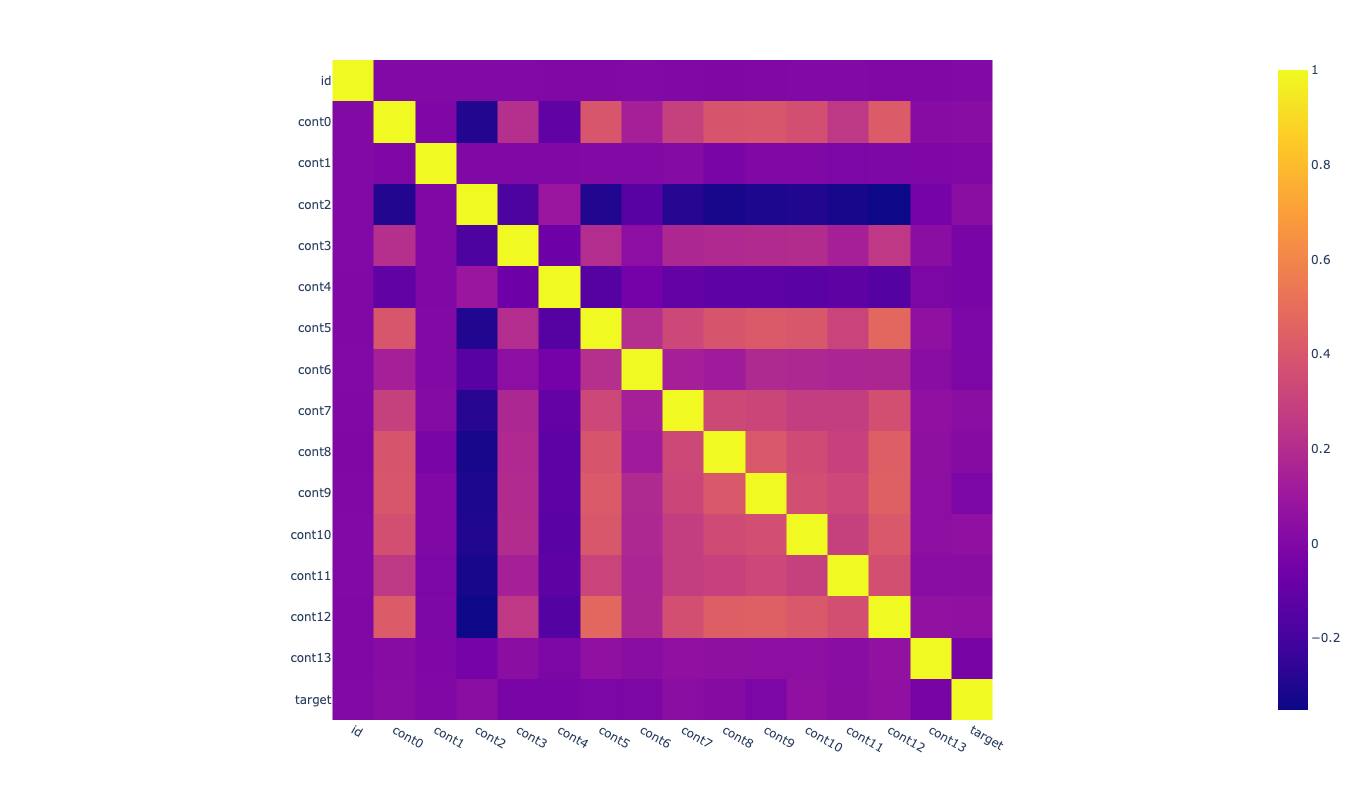

time: 230 ms (started: 2021-08-17 14:36:37 -07:00)


In [12]:
px.imshow(train_data.corr())

In [13]:
X.corrwith(y)

id        0.000480
cont0     0.028819
cont1    -0.002096
cont2     0.034280
cont3    -0.022759
cont4    -0.023132
cont5    -0.015058
cont6    -0.013807
cont7     0.035143
cont8     0.017740
cont9    -0.015726
cont10    0.052468
cont11    0.033378
cont12    0.055829
cont13   -0.028189
dtype: float64

time: 84.8 ms (started: 2021-08-17 14:37:03 -07:00)


---

### Categorical Data

---

## Feature Engineering

The Goals of feature engineering:
- improve a model's predictive performance
- reduce computational or data needs
- improve interpretability of the results

The possible ways of feature engineering:
- Creating new features
- K-means clustering
- Pinciple Component Analysis

Metric of feature engineering:
- Mutual Information

---

### Mutual Information

In [19]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X[num_cols], y, False)
mi_scores[::3]  # show a few features with their MI scores

cont12    0.021699
cont2     0.009703
cont8     0.008054
cont11    0.005455
cont13    0.001485
Name: MI Scores, dtype: float64

time: 2min 3s (started: 2021-08-17 14:41:48 -07:00)


In [17]:
# Review the MI score from the raw numerical data
mi_scores = make_mi_scores(X[num_cols], y, False)
mi_scores[::3]  # show a few features with their MI scores

array([0.        , 0.00735732, 0.00125065, 0.00970292, 0.00498537,
       0.00880145, 0.0039533 , 0.00571589, 0.00952601, 0.0080541 ,
       0.01210391, 0.01848569, 0.00545539, 0.02169892, 0.0014853 ])

time: 2min 11s (started: 2021-08-17 14:38:27 -07:00)


In [16]:
X

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,B,B,B,C,B,B,A,E,C,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,2,B,B,A,A,B,D,A,F,A,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,3,A,A,A,C,B,D,A,D,A,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,4,B,B,A,C,B,D,A,E,C,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,6,A,A,A,C,B,D,A,E,A,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,499996,A,B,A,C,B,B,A,E,E,...,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,499997,B,B,A,C,B,C,A,E,G,...,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,499998,A,B,A,C,B,B,A,E,E,...,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


time: 111 ms (started: 2021-08-17 14:38:03 -07:00)


---

## Data Engineering

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

time: 426 µs (started: 2021-08-17 14:56:21 -07:00)


In [28]:
# Test numberical data first
X_train, X_valid, y_train, y_valid = train_test_split(X[num_cols], y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

time: 56.4 ms (started: 2021-08-17 14:57:35 -07:00)


---

## Modeling

### Training

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

time: 408 µs (started: 2021-08-17 14:57:37 -07:00)


In [31]:
# Define the model
xgb = XGBRegressor(random_state=0)

# Fit the model
xgb.fit(X_train, y_train)

# Prediction
pred = xgb.predict(X_valid)

# Calculate MAE
rmse = mean_absolute_error(y_valid, pred)

time: 12 s (started: 2021-08-17 14:58:17 -07:00)


In [32]:
print(rmse)

0.5772821622641486
time: 352 µs (started: 2021-08-17 14:58:39 -07:00)


---

### Evaluation

---

## Predictions Submission

In [36]:
# Try numerical data first
test_pred = xgb.predict(test_data[num_cols])

time: 77.1 ms (started: 2021-08-17 15:11:54 -07:00)


In [ ]:
predictions = pd.DataFrame()
predictions["id"] = test_data["id"]
predictions["target"] = test_pred

predictions.to_csv('submission.csv', index=False, header=predictions.columns)
predictions.head()